In [1]:
import pandas as pd
x=pd.read_csv("Emotion_classify_Data.csv")

([<matplotlib.patches.Wedge at 0x275e091ba90>,
 [Text(0.5393804528751938, 0.9586807221677878, 'anger'),
  Text(-1.09938882389497, -0.03666352267356347, 'joy'),
  Text(0.5710339611679065, -0.9401703118014788, 'fear')],
 [Text(0.2942075197501056, 0.522916757546066, '33.687046%'),
  Text(-0.5996666312154381, -0.01999828509467098, '33.687046%'),
  Text(0.31147306972794897, -0.5128201700735339, '32.625905%')])

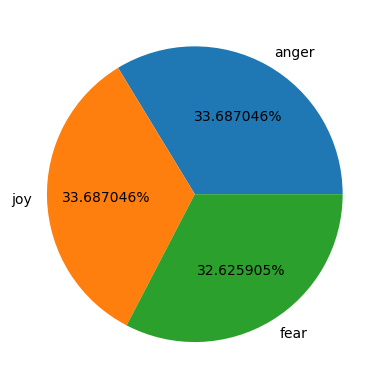

In [2]:
import matplotlib.pyplot as mp
mp.pie(x['Emotion'].value_counts().values,
       labels=x['Emotion'].value_counts().index,
       autopct="%3f%%")

In [3]:
import re
import pandas as pd
import spacy
from nltk.corpus import stopwords
from multiprocessing import Pool

In [4]:
import pandas as pd

x = pd.read_csv("Emotion_classify_data.csv")
x.to_parquet("Emotion_classify_data.parquet")

In [5]:
x=pd.read_csv("Emotion_classify_Data.csv")
x

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [6]:
import spacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))
ctr=0
def words_lemm_fast(text):
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc]
    filtered_tokens = [token for token in tokens if token not in stop_words]
    lemmatized_tokens = [token.lemma_ for token in doc if token.text.lower() in filtered_tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    global ctr
    ctr+=1
    print(lemmatized_text+" ",ctr)
    return lemmatized_text

import pandas as pd
x=pd.read_csv("Emotion_classify_data.csv")
x['Comment']=x['Comment'].apply(lambda y: words_lemm_fast(y))
x.to_csv('cleaned.csv')
print ("DONE")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DIPAK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


seriously hate one subject death feel reluctant drop  1
full life feel appalled  2
sit write start dig feeling think afraid accept possibility might make  3
really angry r feel like idiot trust first place  4
feel suspicious one outside like rapture happen something  5
feel jealous becasue want kind love true connection two soul want  6
friend mine keep tell morbid thing happen dog  7
finally fall asleep feel angry useless still full anxiety  8
feel bit annoyed antsy good way  9
feel like regain another vital part life live  10
feel bit like franz liebkind producer many people know fuhrer terrific dancer  11
feel start not want move much really glad experience glimpse sort vibrant energy gain year  12
bite dog  13
always find feel thankful year gather trick allow feel grateful face moment last thing want say thank  14
try talk anyone feel irritable like  15
feel like hate since  16
not know write following little note feel today u r offend follow post obviously live long enough comprom

feel grumpy woman problem grumpy five year old want get way kind grumpy think difference  136
feel like back element pleased surround adorable tiny garment  137
know feel tortured read  138
feeling hell casual favorite blue red heavy color casual table otherwise could see tournament deck red popular possibly blue step place one zendikar block rotate  139
think valid complaint not willing deal aspect imagine rather subjective make sure cover base moment still feel dangerous despite cover  140
feel like must popular choice alteration do elsewhere  141
feel bothered  142
notice go start feel irritated easily annoy thing feel tiny ache inside almost unnoticeable first day tiny hair burrow way foot  143
say without emotion feel freak fearful anxiety well chest  144
understand extremely positive attribute overshadow weakness subconsciously people wire feel superior other thereby treat differently  145
find hard feel relaxed hour  146
feel grumpy sore  147
make assumption base see think feel 

feel much festive tree  265
feel like creative professional need unpressed creative outlet get inspire  266
feel distressed supportive campaign senator jackson tell cnn  267
feel like obnoxious post every three second  268
girl enter division work greet everybody  269
start feel apprehensive  270
feel afraid stop shoulde  271
feel bitter towards god  272
teenager people feel need make sarcastic bitchy comment kindly fuck  273
hate see red window even feel inside resonate cold uncaring world know exist behind make even aware pain inside  274
understand feel uncertain abc link  275
come china feel little frightened everything around  276
tire hearing unique communication special feeling sincere  277
get feeling nellie satisfied phone rang happy leslie room  278
feel weird seldom people eat  279
feel fearful  280
slow bit stay partly feel like start win give partly afraid push kill try stay  281
feel bitchy today today realize could not count friend anymore  282
feel foundation faith shak

feel bit adventurous put red lipstick rouge artist intense make ever  405
thing feeling afraid express stand believe  406
also feel little selfish get excited hit friend friend make feel victorious choice  407
want pass away feel good brother grandparent  408
spend much morning feeling like impostor visitor someone else life uncertain anything next  409
feel petty say fuck technically not get gift  410
feel see always possibility someone might laugh feel disgusted easy express feeling story boyfriend  411
never feel brave want believe order brave make conscious choice whether want brave  412
feel bit apprehensive not know little note card stand mass talent etsy  413
feel like ya allah scared puff fun man idea  414
feel like leave artistic equivalent crack couch cushion  415
start feel anxious  416
probably lazy lounge around house possibly go pool depend feel bother last day go back work yeah  417
know tenge get almost anywhere feel impatient offer  418
overhear victory tune geek ringt

sure pleasure live open air sky roof ground table part feeling savage return wild native habit  533
feel doubtful  534
get involve tale good versus evil want feel afraid dark certain extent  535
want talk limited time phone current arrangment feel hesitant bring  536
feel really ok  537
feel strangely indecisive also not really believe  538
feel like little barbie doll get decorate hate heel wear  539
feel like character precious  540
admit thought go head feel doubtful times coz scared  541
feel doubtful even struggle bit faith even time seem dark feel alone know god  542
see friend part feel like leave bedroom could dangerous  543
still feel expect piece world afraid come close place expectation upon fear hell disappoint  544
feel anything strange tugging relieve say least  545
two shot lupron feel fine  546
already feel terrific  547
work today writing make sure rest house perfect could make feel peaceful sense order pm linda write always make feel well accomplish  548
rarely feel h

know like recommendation function modern web shop feel little bit strange see product search web shop totally different site advertising  671
feel petty even though thought not real flesh thought flutter feel like kind thought  672
feel try stubborn ignorant time keep go  673
guess feel bit vulnerable look input tonight  674
feel less intimidate help  675
leave word feel doubtful naight ever end  676
feel sarcastic today  677
feel divine strong  678
want feel dissatisfied want feel happy fulfil want feel lack something nothing life would emptied  679
wear little concealer day feel brave not want pale perfect  680
feel afraid cos not answer  681
ask make feel fabulous say healthy family healthy live free country  682
feel successful make sense  683
tell not want feel uncomfortable  684
feel like rebellious year old stand doorway flick light depth spirit  685
feel like completely satisfied result  686
wish could open people feel terrified reaction opinion  687
feel hesitant put much else

feel fearful upset situation life notice reminder sit right begin repeat affirmation  805
feel mellow calm  806
feel suspicious snoop computer  807
vent cry little calm feel less hostile  808
mm comfort zone long feel need get bit creative composition  809
really like lot think great fit love talk patient try help feel less nervous least someone care minute  810
wound feeling pleased tightly pace film  811
feel like heartless feelingless know word daughter teenager  812
feel reluctant join class trip beijing  813
pretty happy little nauseate side feel thrilled  814
feel like put innocent man death row  815
think dharavi mean mumbai country keep annual turnover aside feel agitated  816
love not always feel brave  817
go sleep feel give precious time something else life  818
stoned endorphin feel leg muscle seize petrified meat  819
put forward social diktat make feel rebellious towards authority  820
go presence pray wisdom patience feel instantly furious  821
feel like petty murder sho

start feel frantic candle match one flashlight actually asher bug light fan house move bed outside boy bath not touch candle goodbye meat fridge  961
leave feel happy time rest take care time huge sense guilt build inside respect date unreliable teacher selfish friend  962
draft post least month ago feel quite uncertain  963
simply not want make mad want able share thing feel like emotionally far apart make mad make unable go  964
feel little intimidate rider central park right not want go  965
feel bit rude writing elderly gentleman ask gift feel bit greedy christmas mild greed  966
find every body beautiful want people feel vital body  967
bit impractical thought feel make life less doubtful  968
know feel ache pain tummy get frightened incase em  969
feel bless year thankful learn  970
think feeling one nay important thing  971
know exactly put feel like really acceptable foist inconvenience family  972
still feel vulnerable hurt manageable  973
feel everyone ability artistic specia

even feel outraged  1104
feel jealous think wrap clean warm soft  1105
find someone know someone else take test  1106
could sit hour old friend catch feel like uber gorgeous  1107
not feel cold fire every night  1108
begin feel even agitated realize keith detour tourist stop another small mountain village way xela  1109
feel pressured say something  1110
feel like bitter towards people upper class upper class  1111
expect ou win feel strong competition pretty talented experience ok state squad  1112
come follow draw blank call help feel fearful attack  1113
start feel alarmed  1114
could genuinely connect enjoy instead withdraw feel resentful  1115
feel hostile thought take credit card  1116
feel content alive motivated  1117
already feel impatient cancel hyundai tucson last year wait almost seven month  1118
feel insulted offend hurt  1119
feel part family universe rather fearful  1120
feel awfully bless  1121
feel reluctant walk  1122
love whiff certain scent take back certain time p

stop rely view other self worth thus feel threaten behavior  1246
feel though past two month strange wake hour upon even strange dream everything year wisconsin  1247
know beginning already feel fuck  1248
become comfortable remodel office feel much gratitude wonderful amenity  1249
feel excited  1250
kinda feel like rebellious libertine know  1251
sense mind eye feel divine energy way aloft experience reflection sometimes like rare sunny day rainy climate  1252
feel like give lot valuable information way improve skin present maintain improve future  1253
feel confused  1254
know feel sincere could tolerate small trouble stand character performance sex life husband wife  1255
lovely nesty feeling look cute teeny weeny clothing  1256
learn express feeling way acceptable  1257
feel bit stress sheer number button press enthusiast gather around bike  1258
go walk mother evening feel frantic anxious energy lose daughter not know win back  1259
finish feel amazing  1260
feel pressured people

might start feel nervous tomorrow sure  1384
get amazing news tracy today final cover chapter wonder feel rushed seem not enough time  1385
feel quite nervous  1386
feel angered firey  1387
feel petty getting work stuff really make way  1388
feel child harm way feel frightened  1389
still able remember single dull moment detail piss thing not feel comfortable  1390
question wonder not feel jubilant  1391
love give great feeling contented accomplishment  1392
mean would feel euan get haul murder know innocent  1393
always get feeling hate  1394
feel restless irritable discontent  1395
end episode feeling really pissed  1396
would guilty conscience would feel like heartless bitch  1397
close eye anger feeling disgust touch  1398
feel sort anxious sure  1399
feel team pretty dangerous playoff york left wing ruslan fedotenko note say  1400
feel really petty moment extremely angry break moment sort piss  1401
drive away today feel overwhelmed news hear trillion time news heart know already 

hang around young people feel like see photo we together suddenly shake see old look  1526
feel invigorated ready ahead excited share information  1527
feel honored know  1528
feeling may popular lady folk  1529
feel people encounter day rude mean reason  1530
feel tranquil right great  1531
put christmas tree feel fairly festive  1532
feel like wine something amuse  1533
feel quite nervous scared x scared cos ill take plane back singapore cos can not stay long two friend plan  1534
feel like not even bother  1535
think people little problem express help feel afraid let hang express emotion get nearly much airtime  1536
know believe feel part still hesitant old would say anyone believe god crazy  1537
sometimes feel vulnerable lose  1538
feel uncertain similar family reach uncertainty preclude we serve meantime discover way reach other  1539
say feel helpless walk toe  1540
feel like someone strange uncle try break ice party show amazing talent thinking guest impressed turn make everyt

try buy fabric would use project feel really fab  1653
feel determined regain routine proud  1654
feel really disgusted pain agony  1655
feel far perfect area motherhood  1656
recall see leave fall tree set grey sky feel absolutely terrified  1657
feel like want rebellious regret do single daughter  1658
feel though reach point career highly respect  1659
absolutely love skinny fiber wonder feel fabulous  1660
already feel atmosphere around seem dangerous  1661
ironic feel not feel anything special still smile broadly whenever tell something  1662
mean could literally feel feel content  1663
grandmother come stay we permanently difficult person stay start tell false story we people  1664
feel safe leave house morning  1665
feel like beluga whale quite grouchy  1666
attack teenage boy wallet steal  1667
feel smart tell people like wally lamb actually chick light always mention people respect  1668
stay vienna class  1669
feel like distract  1670
fit beirut nagging feeling heartless plac

feel extremely agitated come home china  1778
feel ok go world work buy food go walk  1779
miss way make feel point accept betray never go back  1780
feel timid six time wise sixty six  1781
face turn red feel shy emm  1782
feel particularly obnoxious tonight  1783
want say want feel come bitter angry  1784
hope look back future feel glad document small way feel possible even love  1785
feel like selfish bitch feel way countless impoverished people suffer surely hundred fold  1786
bop around house yesterday singe possibly loud bit feel charming oh charming  1787
want woman feel envious figure say oooh never guess baby  1788
could already feel difference strength technique class three class start find balance though still pretty shaky business  1789
feel like garbage can not think thankful right hurt badly  1790
know people may cringe feel something say wanna get mad well get mad  1791
never feel fuck week use feel great acctually thinking wonderfull time weekend img src http israel  17

see piano either new cheap large always something miss make feel uncertain buy  1908
feel like need make list leanne would appal thought not miss anything  1909
feel bitter honkerblonke general  1910
feel like whirlwind next try impatient wait  1911
overcome heat start feel weird  1912
end shoeless make feel even vulnerable slow  1913
able guess pick lot plot twist episode first hint give whether moffat use really obvious foreshadowing solid grasp narrative logic sure like build suspense make feel clever  1914
feel like manager everyday feel respected day well  1915
feel really annoyed today  1916
feel rather stress preparation prom night  1917
like ending feel like little bit rush  1918
feel mellow side today  1919
hope make feel greedy shit hope make feel greedy whore like sniiiiifff honey try make feel loved happy  1920
feel shy cause realize people behind not dance look we gt  1921
say first listen yunhos rap give wtf feeling listen couple time determined learn  1922
cycle past par

feel bitchy hurt  2053
feel little skeptical would arrive time situation improve fact despite various perfect party setup seek ffxi nobody bother set include duh lazy  2054
feel somewhat relieved disappoint two qualified venue question neither bother make observation  2055
fear would feel resentful process not happy  2056
tell dh feel internally shaky  2057
feel especially thankful many small blessing life right  2058
feel honored grateful wonderful people entrust we beautiful boy son  2059
feel tip give useful especially parent young kid like  2060
feel like people aggravate  2061
sometimes feel like artistic redcoat  2062
feel peaceful good nature  2063
feel bit doubtful last couple week  2064
get feeling hate would admit let know hate every single obstacle keep every single leaden block keep place clear path one another arm  2065
feel read word realize one time good writer feeling share sympathy  2066
feel helpless well protect  2067
start feel really confused  2068
feel like talent

feel stressed overwhelm come rely meet mostly club  2187
feel kind insecure anyways back doha  2188
would feel excited wait mailman come house hand letter  2189
mean not feel like one feel like casual outing meet catch  2190
hope make friend feel welcome  2191
remember feel impatient even struggle like time  2192
feel torture sense wrong  2193
feel selfish time want escape day day feel like think kid take instead  2194
horrible tragedy something terribly ashamed something cause great pain make feel vulnerable one two trust people know could call help  2195
feel honor veil lift moment  2196
feel though least range age doubtful believe religion uncommon mother bear see atheist mean moral person  2197
really love day make feel gratitude wonderful day make feel happy  2198
feel irate  2199
feel nervous  2200
feel irritated suppose guy waste valuable time talk lady  2201
feel peaceful whole situation  2202
feel hesitant want buy another house  2203
feel like give shout delicious  2204
reply

get headache easily agitated feel frightened aggressive  2337
might potential job line feel generous  2338
not think would touch book not receive free get past judgment author white people problem entitle rich whining self delusion feel like get something valuable book  2339
feel grumpy irritated  2340
feel like give relationship forever hardly ever successful maintain friendship pressure settle age  2341
want feel frustrated anymore  2342
still feel shaky bad hit area damage destruction complete  2343
feel little annoyed people  2344
feel agitated sort lose  2345
really carry grudge long time feel wrong hurt someway whether aware  2346
feel bother fact we give many chance see least bit appreciation utter gratefulness downright soul  2347
pay bill still cash bank leave feel pretty satisfied right  2348
feel scared ra lot work go job  2349
feel like rather unkind  2350
constantly panicky make big fuss learning exam result often feel spiteful lose mark two top class  2351
work one thing 

remember year ago yesterday feel unsure scared future hold  2479
feel much rather stay singapore spend time friend hate everyone sara really bitchy right div style clearboth padding bottom  2480
leave feel little shake  2481
hate expectation must need man life feel worthwhile value  2482
go guy someone want genuine guy would treat right spend quality time make feel special  2483
not know feel unsure aout thing especially people  2484
means huge however find extra weight make feel uncomfortable well clothe  2485
watch violent movie  2486
feeling really pump run strange  2487
feel still angry  2488
think people reject feeling terrified truth see die actually go away scary  2489
get really feel like hit lottery scared something like x screw  2490
feel honor art go fill room sick child need joy get  2491
love porn industry feel satisfied fulfil work say really bring big buck  2492
feel really carefree today really carefree  2493
go birth baby feel shaky  2494
hate feel bitter  2495
show pa

feel relieved rescue party arrive  2603
determined lose weight healthy way work hard school well friend speak freely feel truthful people get sleep  2604
feel fuck ever nothing school work  2605
think drive fashion pretentious go to make sound study fashion design feel kinda vital understand try life whole  2606
feel vulnerable yet extraordinarily liberate  2607
feel rich yup know blessed  2608
course cycle happiness feeling mellow feeling really depressed mellow back beginning  2609
want feel eager attend amp want feel like belong  2610
feel completely irritated right idea maybe usually get home school last hour god awful video impose time  2611
see thing would never do movie adaption feel read book would bother  2612
feel wrong  2613
understand nice feel like weird one  2614
never feel insincere little nosy get hint something might wrong want jump get detail  2615
not feel like really get know feel unsure character  2616
feel completely agitated  2617
something tell girl finally feel

feel ok always hand sit close  2724
love comfy main goal look new clothe stand feel uncomfortable something  2725
feeling go amazing artist like daddy uncle  2726
love pack mate bond touchy feely way sweet  2727
know not live new york anymore feel outraged could happen city  2728
sleep well night feel half brave yesterday  2729
stymie little bit write feel unsure might go somewhere story unintende  2730
weekend home  2731
feel gap feel like rich people status poor people status  2732
idea particular region seem lack visibly necessary outer carniola well feel actually somewhat bother possible evidence lack suburban spirit  2733
feel honoured luckily get post card  2734
start feel annoyed whole thing end order pizza  2735
feel amazing mostly normal go pre thanksgiving celebration friend time softball  2736
not really connect main character anything fact feel like almost innocent  2737
start feel agitated lack patience right cranky  2738
feel every bit spiteful vindictive bitch time  2739

could find another reason new area feel less intimidate simple tool understand  2860
get chat rustie dean hometown moose jaw everyone make feel welcome comfortable  2861
feel place post since feel hesitant join aa full force could use insight people inside  2862
awhile start feel irritated annoy time one kid fill pant  2863
currently feel aggravate  2864
come away experience feel rather confused leave sour taste mouth  2865
start feeling intimidate thought  2866
feel disgusted look number  2867
feel virtuous go spin class drive way blackburn manual unsupervised sucessfully handbrake start  2868
happen could get school initially want  2869
feel answer completely un sarcastic way  2870
wake feel incredibly content amp optimistic today however wake terrible cold complete lack energy  2871
feel agitated sit  2872
feel shaky weak  2873
feel tranquil eloquent charm praise array delight think legard love  2874
know feel like love start get scared actually love  2875
want say feel though not p

know trust feel generally shy away stranger  2986
feel insulted go anyway  2987
feel insecure financially right not want spend  2988
want other happy mean step back yet feel like allow happy deserve even deserve  2989
happy yet feel enraged  2990
feel bit agitated stress find surprising amount relief clean decluttere house even small space like closet  2991
feel hesitant post  2992
look scene think cute enjoy swell feeling pride playful delight dog  2993
feel heartless say though  2994
really hate feeling unsure something  2995
feel agitated jumpy like eat bottle caffeine pill  2996
almost want post sometimes feel intimidate amazingness mom blogger seem perfectly organize home entertained child  2997
every time meet certain dog bite  2998
feel really honored excited meet  2999
feel relieved finally move without single tear shed  3000
must admit matter early start play christmas music holiday shop tree make everything feel much holly jolly  3001
wake saturday feel little bright keen get

want sacred experience feel divine communion god understanding want feel sublime love sacred term  3123
hate feel indecisive negative right not know want  3124
feel less aggravated upset today think realize worth prove waste time effort pointless stupid fine know uneffected time least  3125
feel remarkably grumpy mention foolish  3126
would like reduce amount jealousy feel god command we jealous feel every jew religious obey prohibition  3127
feel fine pretty rough run hour minute straight  3128
know feel bashful defend  3129
feel nervous seem calm collect  3130
feel acceptable even desirable  3131
feel optimistic settle long arrive  3132
feel afraid learn allow afraid  3133
felt unfairly treat airport  3134
feel suddenly startled catch breath think could day  3135
feel head abyss create greedy greedy far greedy  3136
feel like life practically perfect every way right every happy  3137
feel useful  3138
search search search rarely feel satisfied solution find  3139
refer course though 

keep come back feel awfully selfish feel low negative many far bad position  3244
say name feel change nearly violent desire reign difficulty first wave orgasmic stupor envelop  3245
think break good friend year would make bitter feel hateful towards  3246
feel utterly disgust would look way thing continue  3247
feel doubtful ever since take job  3248
feel people not see worth afraid discover  3249
lose good friend one make feel forever content life eternally happy  3250
feel angered  3251
ask zack could go write feel gracious enough let  3252
feel quite scared work life balance start work ken  3253
feel totally carefree around  3254
meet supermarket bank dentist etc make feel like weird  3255
feel bit cranky today  3256
feel cold  3257
feel abit uncertain  3258
feel confident team right four hour ago  3259
use moment opportunity feel radiant beautiful soul hide long behind wall  3260
already feel like less productive  3261
complete act feel temporarily satisfied feeling quickly go awa

meet date continue source apathy bad people feel wrong whose confidence act bad faith  3381
feel cute useful  3382
know feeling powerlessness control send mad tizzy haagen dazs  3383
go putter computer till feel less violent  3384
feel rebellious  3385
feel rude ignore plea help fault  3386
feel cold mostly arm torso  3387
feel bit frustrated tonight  3388
use regularly relax music always feel invigorate afterward  3389
do much reading feel like paranoid extra stuff since one seem  3390
ill admit feel little paranoid wonder many other defriende  3391
believe imagine would like act live front audience make feel joyful  3392
feel rely instinct intellect start doubt whether intuition keen  3393
tend shower day feel slightly rebellious get stinky nothing  3394
could feel strange paralysis body arm hand except odd little force field hold middle finger forefinger thumb  3395
end perfect studio walk feel aggravate yes bizarre  3396
hear way parent friend mistreat  3397
small people think feel

feel shaky weak light head start yesterday morning wake breathe properly matter many deep breath take feel enough oxygen go  3513
horrible anxiety dream every night last week make feel really paranoid course read conspiracy theory unsolved crime online not hugely help matter  3514
feel really confident move tomorrow juice smoothie raw vegan meal menu routine  3515
see nothing dining room table move think start feel safe come  3516
leave feel helpless little sad  3517
feel irritated  3518
feel mellow evening  3519
know person miserable year still feel pretty shaken  3520
still feel little shake  3521
spare gear bike cope two puncture feel particularly paranoid race tyre already two puncture previous three time take train  3522
feel bit greedy  3523
buy synthetic pearl feel need use elegant jewelry trinket  3524
feel resentful try control also want anything rash  3525
feel agitated simply irritated  3526
really feel skeptical politician lately tomfoolery shenanigan go washington nice rea

carry usual guilt feel selfish self center spend time anything  3657
feel rather agitated slide door keep get stick  3658
feel fucking terrific  3659
leave feel quite dissatisfied whole thing specifically dictate med discuss think necessary lifestyle option might reduce risk etc  3660
feel quite agitated irritated amp annoy  3661
forgive accept allow feel terrified move speak scream sleep paralysis  3662
feel cute  3663
really prepare bad innate feeling everything fine  3664
feel greedy idealistic expect would want talk proporte good friend might happy  3665
realise something wrong start feel everyone hate say thing want talk pity  3666
like spoiler cut make feel simultaneously badass considerate  3667
do hill training feel apprehensive  3668
feel clever  3669
always remember feel bitchy world stop take moment breathe think everything grateful joy seep back  3670
mind feel like mind dangerous life  3671
feel way popular culture  3672
feel every step plan take divine help  3673
feel wel

like ros intimidate anna wealth anna feel guilt superior wealth enjoy  3795
think however nice people make feel paranoid something wrong  3796
feel relaxed fine  3797
distinct sickening feeling pause glance kakashi rest eager audience go regret  3798
feel like watch show movie kid bed make sure hop elliptical spin bike least minute show settle stretch night  3799
feel rich blessed joyful  3800
feel fearful sensitive non confrontational drive girl thrive executive corporate world  3801
look kid feel jealous sure  3802
think write like fun fulfilling think decide introduce b blog feel positive overall balanced  3803
professional historian means may feel leave important thing take context  3804
feel insult whenever people say guy can not cry feel emotional  3805
sure else help feel smart  3806
feel sooo bitchy make devin  3807
actually consider buy feel unsure hehe  3808
feel popular today  3809
make joke happy get rid school year feel incredibly vulnerable share other  3810
hear story fe

honest say part feels torture though part system function life one allow order manipulate people way line position serve prupose need  3933
feel satisfied eat feel full long not feel like snack later  3934
will not feel resentful smothered annoy  3935
feel bit apprehensive excited well  3936
feel disgusted jealousy stop take example offensive  3937
realize weekend feel somewhat apprehensive surgery  3938
really can not count number time cry feel overwhelmed someone expression concern fact think  3939
get feeling supervise teacher overwhelmed may many student  3940
compere party effort get show rolling thwart immobile  3941
feel really vulnerable tell much honest hate  3942
feel shy able talk  3943
could feel body start shake nervous anticipation  3944
want leave thank parent trust spend night make feel like respect  3945
think significant feeling leave week deeply privileged live live  3946
enjoy feedback love comment post please feel afraid  3947
admit defeat ask half come back lake c

feel brave enough  4057
feel positive contribution innovation may still worth consider adjustment economic financial structure whole society improve labor productivity  4058
feel fine  4059
feel weird make exact replica someone else work  4060
feel determined not take long start nomming naughty stuff  4061
feel ecstatic relived bottom heart truely grateful  4062
feel every part agitate reality kingdom walk talk  4063
meet man feel insecure woman  4064
feel angry simple msg make blur really blur  4065
feel joyful write blog rather knit  4066
feel bit shaky bit centre think worry thing control  4067
feel combination terrified relieve  4068
feel shake wait thing settle  4069
feel slightly offend  4070
keep cry feel cranky  4071
feel like need face world stop afraid repercussion  4072
feel say thing not want agree rude  4073
go pick kid feel scared trembly self critical stupidity  4074
remember sit class actually feel eager learn amp p  4075
guess feel irritated great music get ignore even

plead people feel distraught not hear  4207
like new bunnysuit wear feel cute  4208
feel little torture lose  4209
feel like movie dangerous mind  4210
highly recommend want feel totally amazing ab  4211
really feel wrong patient  4212
realize conversation make people feel paranoid upset generally  4213
take part football match referee extremely partial opposite team stir discontent anger  4214
really shut lot end pregnancy feel even irritable anxious maybe need bounce back get back normal  4215
feel come determined see  4216
feel corner mouth curl triumphant grin  4217
write moment feel cold chill  4218
feel like finally position decide whether indulge joyful jubilation claim free chocolate bar  4219
become dismayed study people wear start feel like though outfits gorgeous buy way  4220
feel scared unsure place  4221
feel little weird compare big old number young insecure childlike playful silly feel inside  4222
go go anti dance flow feel eager since ill mat anyhow might even circuit

make mistake think less clearly feel anxious  4338
feel distressed supportive campaign senator  4339
feel bit obnoxious definately weather  4340
want know f habitual feel frightened wh n initiation r career  4341
feel festive today even go put tree soon finish catch week going on coronation street  4342
not expect much addicted nicotine experience withdrawal symptom feel irritable stressed go mad craving inability concentrate dry mouth trouble sleep wake every night  4343
ask feel hesitant  4344
go fish really feel carefree fish everyday  4345
feel need mellow find something ipod suit ready pump always get go tune two get rev  4346
inspect sample wheat start feel suspicious character  4347
feel delicious absolutely darling delicious  4348
proclaim lose bit sanity feel shaky  4349
even feel strange forget primer put foundation bare skin  4350
brush side tuck behind ear feel rebellious strand escape tickle cheek lip realize one control  4351
able maintain physical mental activity well ne

feel keen get camp site realise give good gift free accommodation free service  4472
feel bouncy enough rustle people keen go  4473
feel phrase imply calm orderly procession would remove refuse  4474
not feel anything special  4475
would knowingly wound feeling even one may wrong would seek good make friend  4476
love feeling run cold see breath cold air seem refresh inside  4477
want go ask batting feel hesitant approach big player  4478
feel little nervous anxious never second guess decision  4479
detest feel uncertain  4480
actually feel frightened people right  4481
feel though write often enough cruise life equally special way  4482
feel paranoid tonight check blog stat  4483
manage whole tuesday eat clean caffeine today feel rather shaky  4484
think affect much result back one big flaw feel enough pretty enough smart enough name  4485
spend much time feel comfortable  4486
sometimes confused well moment time need day pay bill come not money need sometimes feel confused well  4487

yell kid drop hat reason possess energy anything feel irritable sad everything  4607
feel though divine intervention behalf  4608
get feeling person end hate  4609
want world feel strange  4610
walk another street stop feel helpless hopeless  4611
feel like suspicious happy see  4612
definitely ton learn still feel hopeful program  4613
feel hateful everything suddenly  4614
might also write bit science feel particularly energetic  4615
feel thrilled able investigate personal mythology around subject  4616
not want make bad impression new co worker job lab simply feel insecure agitate time  4617
feel confident bless child lord time  4618
feel strange sort will not resort  4619
love comment feel free  4620
wish could huge collective book club think conversation critical time people feel increasingly fearful unsettled disconnect  4621
feel rush make poor food choice start slide back towards bad habit  4622
break uncle radio player accidentally fear go cut go house well play  4623
feel ha

smoker year quit week ago right finish book can not believe free feel know quit terrify life without cigarette  4727
admit feel bit intimidate challenge  4728
kind angel sometimes also mean devil use use harsh word feel irritated  4729
like one take listening session get real feel lot distortion song agitate bit cause little research creative force behind unusual album  4730
mane feel generous release new lp diary trap god free  4731
necessarily think f bomb sex necessary story feel reassure see print journal  4732
feel femme fatale except cute anymore pretty obvious britney control life burn yet get impression almost force career point can not will not deliver anymore  4733
spend follow month drug induce haze incapable thought feeling anything glamorous  4734
feel like helpless duckie target commie feds time want run hide  4735
sleep room wake middle night think could hear noise see shadow move feel someone house  4736
moment past couple day feel restless like need move around constan

may feel generous normal really think lot team well draft good player good spot fill need  4857
feel greedy care  4858
feel like flying afraid go miss something  4859
feel bit relieved  4860
may trust partner look need relationship feel threaten not control situation obviously neither  4861
talk elder ditlevsen day plan college thing guy way excited get back tell remember feel little nervous parent  4862
feel lately vulnerable impressionable little emotional  4863
feel reluctant talk issue immediate especially one make much difference individually spread word  4864
truly feel portrayal jesus movie gratuitously violent  4865
feel relieved pick boy shut place seize dog happy get  4866
keep wait grand stroke wisdom peace overcome feel irritable bewildered  4867
feel pressured write pressure write least ingrain  4868
feel impatient come certain issue  4869
feel pretty tortured work job often inspiration strike work  4870
year old must admit make feel uncomfortable  4871
feel agitated moody

feel content send packet packet world  4984
begin feel cranky feeling hell  4985
listen feel peaceful happy could not use big dose life  4986
feel like class clown outgoing person  4987
strong feel scared lonely lose confuse  4988
do though kind find sympathize demon church call feel disgusted people suppose try fight  4989
way ahead raphael laiya jennifer stay behind watch stuff since feel particularly energetic scamper mountain  4990
get platitude well meaning folk make feel like bother thing bother  4991
feel relatively indecisive hungry walk past barbeque place  4992
catch thug age  4993
feel hate care  4994
feel annoyed way economic job market set  4995
admit feel little hesitant embed music video case  4996
feel especially strongly since hate tooth forever one unlucky one get bad genetic even bad orthodontist pediatric dentist  4997
realize last month generally tend feel tremendously dissatisfied sex  4998
long feel timid insecure walk  4999
feel wimpy know one year old send old 

hate much feel like look pretty damn flawless pic  5118
thankful work place feel comfortable support  5119
see way serina feel strange useful sure help cleaner pretty expensive pay money would pretty great  5120
bike bike feel kind strange  5121
can not tell word much feel honor photo make gallery  5122
double victory brown struff go back sunday feeling really optimistic look forward another day fill fedtastic tennis  5123
not show insecurity persona might come mad bitch practically hate everyone feel insecured overly paranoid  5124
really feel life perfect right not much ask hope everything would stay  5125
feel even center please w thing go w feel complacent  5126
need intentional thing like think mom sometimes feel like lose personality b c smart kid sense humor make silly face chase around house like monster  5127
even mention show want trust feeling hope would think rude mean coercive pushy  5128
guess feel fulfill artistic pursuit certainly time economy pick  5129
feel like get a

keep wonderful feeling dream terrified bad harmful wrong  5244
start feel kind skeptical  5245
remember feel violent disgusted oscar winner tell access hollywood  5246
feel grumpy past day not feel like upbeat self blog  5247
want root someone feel wrong condemn behalf  5248
terrified feel terribly keen right  5249
feel shaky day  5250
invite send email detail way feel wrong promise post unedited outside name blog  5251
monitor say anything ever come across blog feel offended please not stop  5252
still try find footing three year feel shaky ever  5253
classmate get b homework get c get result act merit grade find humility hypocritical find disgusting  5254
know unfair reaction run way explain feel shake good come right  5255
feel rush lack time jerry springer weather amp suddenly want put porn confused hey let enjoy fun fun fun without hun without block hype  5256
feel special many people pray hard  5257
feel hopeful come year  5258
feel fearless janelle mon e elle canada february img

feel irritable grumpy today come home lunch take nap  5376
want people feel brave want society accept we disabled people amongst we deserve dignity respect shun laugh  5377
gain wieght really would like lose pound feel like finally get acceptable happy place  5378
feel excited something soley video  5379
feel like perfect w see youtube influence even know trend  5380
miss miss comment feedback feel little resentful shut due bad apple folk not understand much might baffle well life  5381
hate ask feel reluctant try kiss  5382
say unsure feel insecure other think  5383
feel nervous control pretty soon  5384
see form not yet feel agitated  5385
see neurosurgeon document conversation regard safety patient relationship whether feel threatened  5386
get walk rain feel triumphant nature rain boot pink rain coat  5387
walk dawn treader feel fairly skeptical walk three great book one hardcover book japanese pick mom  5388
predict take deal situation feel safe  5389
feel anybody get angry awkwar

keen incorporate use recovery tool feel tool useful allow patient control mental health  5506
see feel divine  5507
like feeling scared jump seat grab arm preferably male companion  5508
help feel inspire uplift martinez association occupy wall street  5509
thankful feel useful  5510
feel angel steal greedy jaw death chance pull steady hand give second chance artist ambulance pick ground flash light sound  5511
hope sensibility deep feeling individual not badly shake display pink locker room  5512
really feel irritated  5513
feel feel quite beloved brother  5514
feel determined offer possibility parent give explore create path  5515
patient expect get well suddenly pass away show meal  5516
not feel fantastic week think something different easy write think could fun  5517
not start feel nervous friday saturday not feel much nervous scared respectful enormous challenge lay  5518
tell feel anxious turn thirty  5519
admit feel little irate well control  5520
feel glamorous little lacy bot

feel like present less hostile manner drag event gather full stupid fake people  5633
hi tech color club holiday splendor sally hansen cha ching kiss silver glitter feel little festive tonight decide  5634
feel awfully indecisive morning start think want get heart pumpin  5635
feel well  5636
feel must violent dream snap awake difficult dream mother represent anyone everyone self violence universal beautiful metaphor  5637
year old one time know dad not come home bad feeling ever feel hate since will not ever change  5638
also know forget period time would cause tension feeling unease maybe mad  5639
feel bit neurotic ill lose job  5640
feel amused kind tired still morning  5641
feel little bit vital  5642
wake feel grouchy irritable feel settle day remove patio small read school book end storm house discover still flush toilet  5643
feel sociable enough thus friend wise guess miss  5644
feel safe  5645
hope realize little effort require make person feel well situation whether family m

leave integrity dignity intact feel pissed  5784
feel unsure future  5785
could claim redeem genre leave feel entirely frustrated point beat head wall either  5786
feel invigorated enthusiastic  5787
feel really wimpy say  5788
feel insecure way examine boyfriend exempt  5789
feel pretty pleased day worried perhaps guess riva think harvey weinstein one big chance win really good help people get oscar  5790
feel energetic bouncy happy go gym run around outside kid take pram long walk often three one day  5791
also need remember bad overeating make feel fullness hangover get food rich sugary  5792
kinda like see hannah montana since break nick feel like heartless person  5793
feel bit overwhelmed whole marathon idea lately  5794
ought consider change wee bit little step backward feel much afraid  5795
hold anger hold back still choose clear mind feel without execute someone something petty  5796
wake always feel anxious know  5797
feel help create rich texture touch mystery outfit  5798


say well feel greedy time  5921
feel instantly glamorous pull handbag sachaye see  5922
feel wonderful grateful support  5923
feel bit scared consider put post work website frequent professional artist decide suck big girl ask feedback  5924
feel quite apprehensive wig feel not full hope would however take account model beautiful long hair  5925
feel bitchy cross whatever  5926
must say familiar face since go church since feeling shy want stay friend clingy meeting  5927
never do anything make cry want cry four month feel little strange never see side  5928
feel angry lead lead people believe could not  5929
mean friend long time thing new right feel like ever want roll eye everything say tell obnoxious  5930
think often feel way plant deeply terrified go deep ground hard get  5931
lose touch thing feel passionate get less spontaneous live list urgh  5932
begin feel distressed  5933
leave feel annoyed angry thinking center stupid joke  5934
ever get marry everything ready offer get tog

# SVC

Accuracy: 0.9132996632996633
Classification Report:
              precision    recall  f1-score   support

       anger       0.90      0.91      0.91       392
        fear       0.95      0.88      0.92       416
         joy       0.89      0.95      0.92       380

    accuracy                           0.91      1188
   macro avg       0.91      0.91      0.91      1188
weighted avg       0.91      0.91      0.91      1188

Confusion Matrix:
[[358  10  24]
 [ 28 367  21]
 [ 12   8 360]]


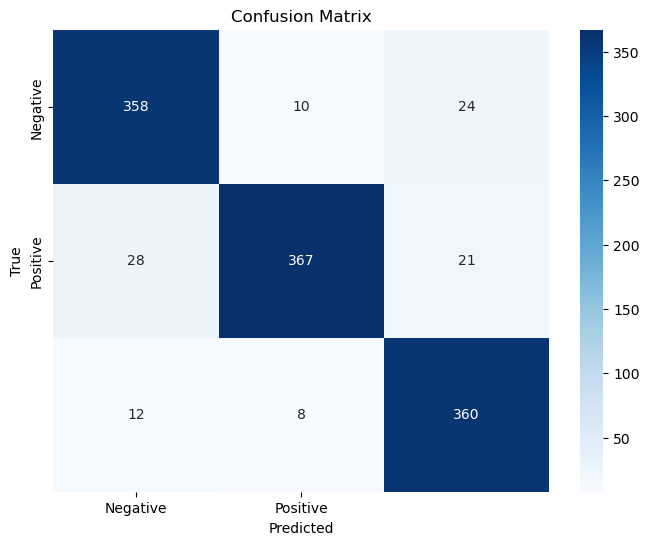

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import joblib
# Load your dataset
df = pd.read_csv('cleaned.csv')

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['Comment'], df['Emotion'], test_size=0.2, random_state=42
)


# Create a pipeline with TF-IDF vectorization and SVC
model = make_pipeline(TfidfVectorizer(), SVC())

# Train the model
model.fit(train_data, train_labels)

# Make predictions on the test set
predictions = model.predict(test_data)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
classification_report_output = classification_report(test_labels, predictions)
confusion_mat = confusion_matrix(test_labels, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)
print("Confusion Matrix:")
print(confusion_mat)

# for heatmap 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Random Forest

Accuracy: 0.9326599326599326
Classification Report:
              precision    recall  f1-score   support

       anger       0.93      0.91      0.92       392
        fear       0.95      0.93      0.94       416
         joy       0.92      0.97      0.94       380

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188

Confusion Matrix:
[[356  16  20]
 [ 18 385  13]
 [  7   6 367]]


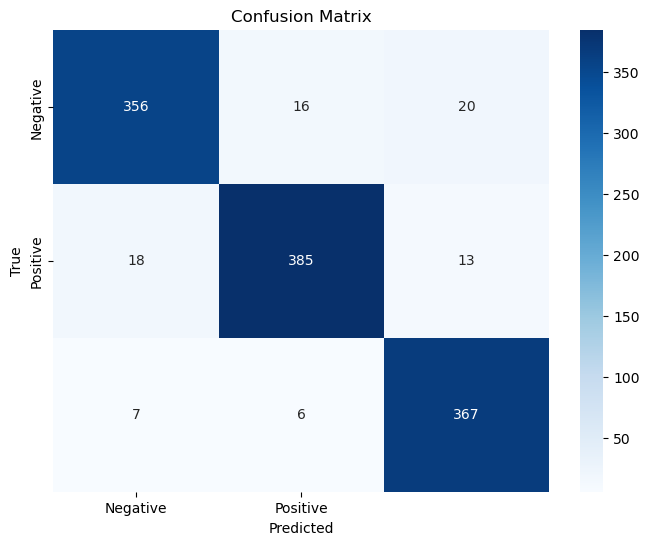

In [8]:
# Importing necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming you have a dataset where each row contains a text and its corresponding emotion label
# Load your dataset into a DataFrame, let's call it 'data'
# The DataFrame should have two columns: 'text' and 'emotion'

# Assuming 'data.csv' is the name of your dataset file
data = pd.read_csv('cleaned.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Comment'], data['Emotion'], test_size=0.2, random_state=42)

# Transform text data into numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features based on your dataset size
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators based on your dataset size
rf_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_vectorized)



# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)
print("Confusion Matrix:")
print(confusion_mat)

# for heatmap 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Naive Byes

Accuracy: 0.9023569023569024
Classification Report:
              precision    recall  f1-score   support

       anger       0.88      0.92      0.90       392
        fear       0.92      0.90      0.91       416
         joy       0.91      0.89      0.90       380

    accuracy                           0.90      1188
   macro avg       0.90      0.90      0.90      1188
weighted avg       0.90      0.90      0.90      1188

Confusion Matrix:
[[359  16  17]
 [ 25 373  18]
 [ 22  18 340]]


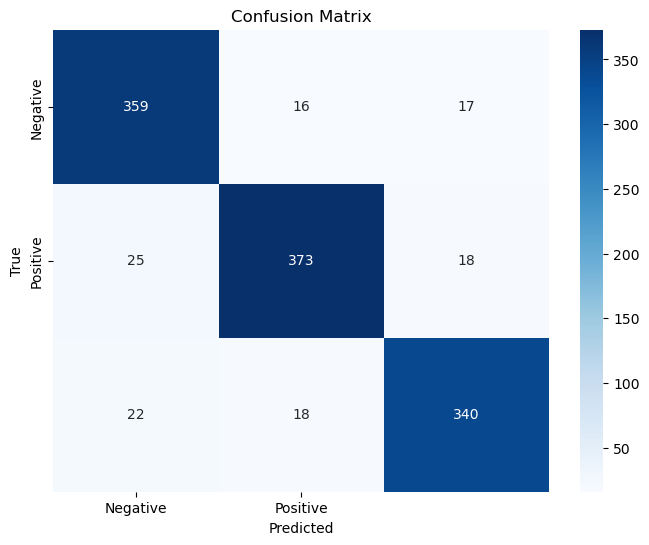

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load your dataset
df = pd.read_csv('cleaned.csv')  # Assuming your dataset is in a CSV file

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Emotion'], test_size=0.2, random_state=42)

# Transform text data into numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features based on your dataset
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize and train the Naive Bayes Classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test_vectorized)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)
print("Confusion Matrix:")
print(confusion_mat)

# for heatmap 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Logistic Regression

Accuracy: 0.9250841750841751
Classification Report:
              precision    recall  f1-score   support

       anger       0.92      0.92      0.92       392
        fear       0.94      0.91      0.93       416
         joy       0.91      0.95      0.93       380

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188

Confusion Matrix:
[[362  12  18]
 [ 23 377  16]
 [ 10  10 360]]


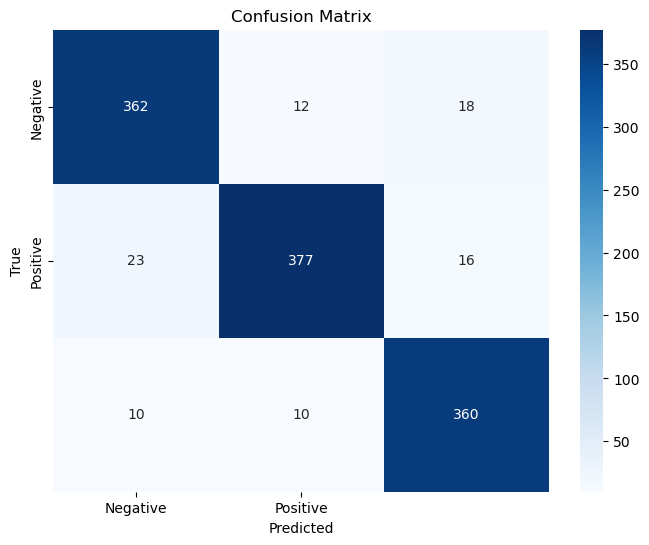

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load your dataset
df = pd.read_csv('cleaned.csv')  # Assuming your dataset is in a CSV file

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Emotion'], test_size=0.2, random_state=42)

# Transform text data into numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features based on your dataset
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize and train the Logistic Regression model
logreg_classifier = LogisticRegression(max_iter=1000)  # You can adjust max_iter based on convergence
logreg_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = logreg_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)
print("Confusion Matrix:")
print(confusion_mat)

# for heatmap 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()